## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction
A/B testing is a user experience research methodology. A/B tests consist of a randomized experiment with two variants, A and B. 

<a id='probability'></a>
#### Part I - Probability

importing libraries.

In [38]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [39]:
df = pd.read_csv('ab_data.csv')

In [40]:
df.sample(5)

,user_id,timestamp,group,landing_page,converted
210092,741402,2017-01-05 15:25:18.328603,treatment,new_page,0
281300,671188,2017-01-05 20:26:52.556433,control,old_page,1
273070,873292,2017-01-05 06:44:57.022192,control,old_page,0
274723,746394,2017-01-19 08:34:18.108270,control,old_page,0
254739,812386,2017-01-07 02:44:04.675132,treatment,new_page,0


In [41]:
df.shape[0]

294478

In [42]:
df.user_id.nunique()

290584

In [43]:
len(df[df.converted==1])/df.shape[0]

0.11965919355605512

In [44]:
len(df.query('group!="treatment" and landing_page=="new_page"') + df.query('group!="control" and landing_page=="old_page"'))

3893

In [45]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [46]:
df2 = df[(df.group=='treatment') & (df.landing_page=='new_page')|(df.group=='control') & (df.landing_page=='old_page')]

In [47]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [48]:
df2.user_id.nunique()

290584

In [49]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

In [50]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [51]:
df2.user_id.drop_duplicates(inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/base.py:1241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


In [52]:
sum(df2.user_id.duplicated())

0


 What is the probability of an individual converting regardless of the page they receive?

In [53]:
df2.converted.mean()

0.11959667567149027

 Given that an individual was in the `control` group, what is the probability they converted?

In [54]:
df2[df2.group=='control'].converted.mean()

0.1203863045004612

Given that an individual was in the `treatment` group, what is the probability they converted?

In [55]:
df2[df2.group=='treatment'].converted.mean()

0.11880724790277405

 What is the probability that an individual received the new page?

In [56]:
(df.landing_page=='new_page').mean()

0.5

<ul>
    <li> Without taking into consideration the group of an individual , the  probablility of being getting converted to any kind of page is 0.12. </li>
    <li> In other case, if an individual belong to <b>control</b> group then the  probablility of being getting converted to any kind of page is 0.12. </li>
    <li> On the other hand , the  probablility of being getting converted to any kind of page is 0.12 when someone belongs to <b>treatement</b> group. </li>
    <li> However,the probability of someone to get converted to new page is 0.50. </li>
    <li> So,there are no sufficient eveidence that someone more intereseted in either of the old page or new page.</li>
</ul>

<a id='ab_test'></a>
### Part II - A/B Test



**Hypothesis**

The hypothesis will be : <br /> 
**$H_{0}$** : **$p_{new}$** <= **$p_{old}$** <br /> 
**$H_{1}$** : **$p_{new}$** > **$p_{old}$**

 What is the **conversion rate** for $p_{new}$ under the null? 

In [57]:
p_new = df2.converted.mean()
p_new

0.11959667567149027

 What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [58]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

What is $n_{new}$, the number of individuals in the treatment group?

In [59]:
n_new = df2[df2.group=='treatment'].shape[0]
n_new

145311

 What is $n_{old}$, the number of individuals in the control group?

In [60]:
n_old = df2[df2.group=='control'].shape[0]
n_old

145274

 Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [61]:
new_page_converted = np.random.choice([1,0], size= n_new, p= [p_new,1-p_new]).mean()

 Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [62]:
old_page_converted = np.random.choice([1,0], size= n_old, p= [p_old,1-p_old]).mean()

 Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [63]:
diff = new_page_converted.mean()-old_page_converted.mean()
diff

0.00018987404301425148

Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process 

In [68]:
p_diff = []
for i in range(10000):
    new_page_converted = np.random.choice([1,0], size= n_new, p= [p_new,1-p_new]).mean()
    old_page_converted = np.random.choice([1,0], size= n_old, p= [p_old,1-p_old]).mean()
    p_diff.append(new_page_converted-old_page_converted)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

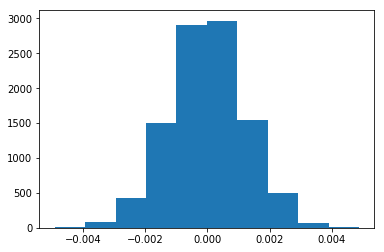

In [69]:
plt.hist(p_diff);

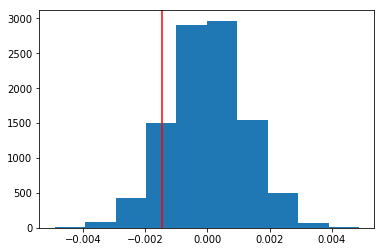

In [70]:
plt.hist(p_diff)
plt.axvline(diff,color='r');

 What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**

In [71]:
actual_diff = df2[df2.group=='control'].converted.mean()-df2[df2.group=='treatment'].converted.mean()
p_diff = np.array(p_diff)
diff = (p_diff-actual_diff)
(p_diff<actual_diff).mean()

0.90390000000000004

**Analysis**

<ul>
    <li> This value is popularly known as <b> p value </b> in scientific field.</li>
    <li> In this case,P value greater than the Type-I error which is 5% suggests that , we fail to reject null hypothesis . So we can say from above observation that , old page has a higher conversion rate than the new page.</li>
</ul>

In [72]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page=='new_page') & (df2.converted==1)].shape[0]
convert_new = df2[(df2.landing_page=='old_page') & (df2.converted==1)].shape[0]
n_old = df2[df2.landing_page=='old_page'].shape[0]
n_new = df2[df2.landing_page=='new_page'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [73]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='smaller')
print(z_score, p_value)

1.26101180648 0.896347703276


 What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [79]:
from scipy.stats import norm

print(norm.cdf(z_score))


print(norm.ppf(1-(0.05)))

0.896347703276
1.64485362695


Since the <b>z-value</b> 1.26 is less than the critical value 1.64 , we fail to reject the null hypothesis.This observation also conforms our findings in parts <b>j</b> and <b>k</b>.

<a id='regression'></a>
### Part III - A regression approach

Since each row is either a conversion or no conversion,we will use Logistic Regression

In [80]:
df2['intercept'] = 1
df2[['_','ab_page']] = pd.get_dummies(df2.group)
df2.drop('_',axis=1,inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [81]:
model = sm.Logit(df2.converted,df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [82]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-26 07:06 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

**Results.**

<ul>
    <li> P value of <b>ab_page</b> : 0.1897</li>
    <li> It differs from part II value because it was randomly chosen and it was tested on one side . But in this case it is tested on two side.</li>
</ul>

Now along with testing if the conversion rate changes for different pages, also adding an effect based on which country a user lives in. 

In [83]:
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [85]:
country.shape,df2.shape

((290584, 2), (290585, 7))

In [86]:
merged = country.set_index('user_id').join(df2.set_index('user_id'),how='inner')
merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [87]:
#getting the unique value of countries column
merged.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [88]:
#creating dummy variable
merged[['US','UK','CA']] = pd.get_dummies(merged.country)

In [89]:
#Dropping one column to make the matrix full rank
merged.drop('CA',axis=1,inplace=True)

In [90]:
merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0


In [94]:
merged['intercept'] = 1
lm = sm.Logit(merged.converted,merged[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-26 07:13 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7629  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
UK            0.0099    0.0133     0.7437  0.4570  -0.0162   0.0359
US           -0.0408    0.0269    -1.5159  0.1296  -0.0934   0.0119
==================================================================

"""

>From above observation we can see that the P-value for countries i.e. UK,US are quite higher than the Type-I error (5%). Therefore, we fail to reject null hypothesis. So, country has no impact on conversion either of old page or new page.`

***Adding higher order terms to find interaction***

In [92]:
merged['US_ab_page'] = merged['US'] * merged['ab_page']
merged['UK_ab_page'] = merged['UK'] * merged['ab_page']

In [93]:
merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,0,0,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,0,0,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,0,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,0,0,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,0,0,0


In [95]:
new_model = sm.Logit(merged.converted,merged[['intercept','ab_page','UK','US','US_ab_page','UK_ab_page']])
result = new_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-26 07:14 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
US           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US_ab_page   -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

#### Conclusion : <br>


We can clearly understand by observing the P-Value that the interaction between page and countries has no impact in conversion of the page. There we fail to reject null-hypothesis. 

***After implicit investigation of the dataset, we did not find any compelling evdidence to recommend that the new page results in more conversions than old page . So, it will be fruitful for the company to use old version of the page.***